In [13]:
path = [[0,0],
        [0,1],
        [0,2],
        [1,2],
        [2,2],
        [3,2],
        [4,2],
        [4,3],
        [4,4]]

def smooth(path, weight_data = 0.5, weight_smooth = 0.1, tolerance = 0.000001):
    newpath = [[path[col][row] for row in range(len(path[0]))]for col in range(len(path))]
    
    change = tolerance
    while change >= tolerance:
        change = 0.0
        for i in range(1, len(path) - 1):
            for j in range(len(path[0])):
                aux = newpath[i][j]
                newpath[i][j] += weight_data * (path[i][j] - newpath[i][j])
                newpath[i][j] += weight_smooth * (newpath[i+1][j] + newpath[i-1][j] - 2.0 *newpath[i][j])
                change += abs(aux - newpath[i][j])
            
    return newpath

newpath = smooth(path)
for i in range(len(path)):
    print('[' + ', '.join('%.3f'%x for x in path[i]) + '] -> [' + ', '.join('%.3f'%x for x in newpath[i]) + ']')

[0.000, 0.000] -> [0.000, 0.000]
[0.000, 1.000] -> [0.029, 0.971]
[0.000, 2.000] -> [0.176, 1.824]
[1.000, 2.000] -> [1.029, 1.971]
[2.000, 2.000] -> [2.000, 2.000]
[3.000, 2.000] -> [2.971, 2.029]
[4.000, 2.000] -> [3.824, 2.176]
[4.000, 3.000] -> [3.971, 3.029]
[4.000, 4.000] -> [4.000, 4.000]


In [2]:
for i in range(1, 5):
    print(i)

1
2
3
4


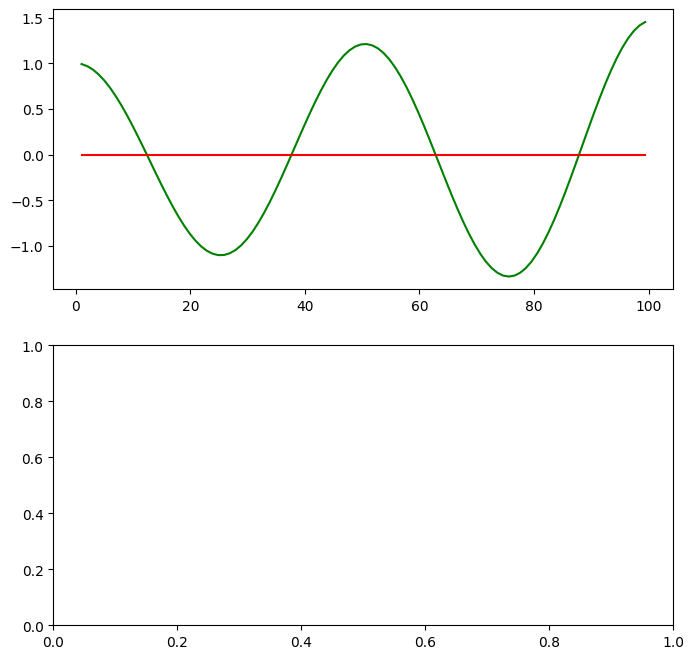

In [4]:
# -----------
# User Instructions
#
# Implement a P controller by running 100 iterations
# of robot motion. The desired trajectory for the 
# robot is the x-axis. The steering angle should be set
# by the parameter tau so that:
#
# steering = -tau * crosstrack_error
#
# You'll only need to modify the `run` function at the bottom.
# ------------
 
import random
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 
# this is the Robot class
#

class Robot(object):
    def __init__(self, length=20.0):
        """
        Creates robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)

############## ADD / MODIFY CODE BELOW ####################
# ------------------------------------------------------------------------
#
# run - does a single control run
robot = Robot()
robot.set(0.0, 1.0, 0.0)

def run(robot, tau, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    # TODO: your code here
    for i in range(n):
        CTE = robot.y
        steering = -tau * CTE
        robot.move(steering, speed)
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
        
   
    return x_trajectory, y_trajectory

x_trajectory, y_trajectory = run(robot, 0.3)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x_trajectory, y_trajectory, 'g', label='P controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')

[x=0.99998 y=0.99493 orient=6.27305] -0.2
[x=1.99987 y=0.98015 orient=6.26376] -0.18378333598598148
[x=2.99960 y=0.95690 orient=6.25611] -0.1516842775874949
[x=3.99914 y=0.92678 orient=6.25000] -0.1216337420201711
[x=4.99851 y=0.89122 orient=6.24524] -0.0949841761939183
[x=5.99772 y=0.85149 orient=6.24165] -0.07156814197837777
[x=6.99680 y=0.80869 orient=6.23910] -0.05110895139499122
[x=7.99579 y=0.76378 orient=6.23743] -0.03334383824482076
[x=8.99475 y=0.71804 orient=6.23653] -0.018029917957323977
[x=9.99366 y=0.67140 orient=6.23621] -0.006382375627704218
[x=10.99255 y=0.62444 orient=6.23649] 0.005648026914503668
[x=11.99146 y=0.57776 orient=6.23729] 0.01599661085355987
[x=12.99044 y=0.53249 orient=6.23851] 0.024486171690353914
[x=13.98947 y=0.48856 orient=6.23998] 0.02930782454118365
[x=14.98858 y=0.44622 orient=6.24168] 0.034061229012650074
[x=15.98775 y=0.40568 orient=6.24357] 0.037779634095909384
[x=16.98701 y=0.36709 orient=6.24560] 0.040503090305401196
[x=17.98634 y=0.33057 orie

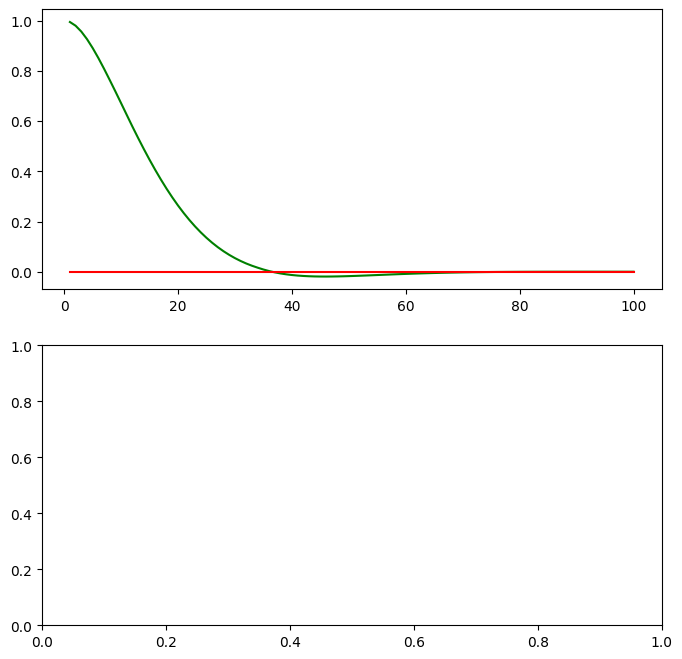

In [94]:
robot = Robot()
robot.set(0.0, 1.0, 0.0)

def run(robot, param1, param2, n=100, speed=1.0):
    x_trajectory = []
    y_trajectory = []
    CTE_d = 0
    CTE_p = robot.y
    for i in range(n):
        CTE_d = robot.y - CTE_p
        CTE_p = robot.y
        steering = -(param1 * CTE_p) - (param2 * CTE_d)
        robot.move(steering, speed)
        print(robot, steering)
        x_trajectory.append(robot.x)
        y_trajectory.append(robot.y)
    return x_trajectory, y_trajectory

x_trajectory, y_trajectory = run(robot, 0.2,3)
n = len(x_trajectory)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x_trajectory, y_trajectory, 'g', label='P controller')
ax1.plot(x_trajectory, np.zeros(n), 'r', label='reference')
        

In [20]:
from math import *



robot = Robot()
robot.set(0.0, 1.0, 0.0)

def run(parms, printflag=False):
    robot = Robot()
    robot.set(0.0, 1.0, 0.0)
    n = 100
    speed = 1.0
    error = 0.0
    robot.set_steering_drift(10.0 / 180.0 * pi)
    CTE_P = 1.0
    CTE_I = 0
    for i in range(n * 2):
        CTE_D = robot.y - CTE_P
        CTE_P = robot.y
        CTE_I += CTE_P
        steering = -parms[0] * CTE_P -parms[1] * CTE_D - parms[2] * CTE_I
        robot.move(steering, speed)
        
       
        
        if i >= n:
            error += (CTE_P ** 2)
        if printflag:
            print(robot, steering / pi * 180.0)
    return error / float(n)


def twiddle(tol=0.001):
    p = [0, 0, 0]
    dp = [1, 1, 1]
    best_err = run(p) 
    n = 0
    while sum(dp) > tol:
        for i in range(len(p)):
            p[i] += dp[i]
            print(f"n={n}, p={p}, dp={dp}")
            err = run(p)
            print(f"error={err}")
            if err < best_err:
                print(f"first error={err}, best_err={best_err}")
                best_err = err
                dp[i] *= 1.1
            else:
                p[i] -= 2.0 * dp[i]
                err = run(p)
                print(f"second error={err}, best_err={best_err}")
                print(f" p={p}, dp={dp}")
                if err < best_err:
                    print(f"third error={err}, best_err={best_err}")
                    best_err = err
                    dp[i] *= 1.1
                    print(f"p={p}, dp={dp}")
                else:
                    p[i] += dp[i]
                    dp[i] *= 0.9
                    print(f"p={p}, dp={dp}")
            print("\n")
        n += 1
    return p

#parms = twiddle()
#error = run(parms)

#print(f"final parameters {parms} --> {error}")



In [27]:
def TwiddleTest(tol=0.001):
    n_params = 3
    params = [0 for i in range(n_params)]
    d_params = [1 for i in range(n_params)]
    best_err = run(params)
    n = 0 
    while sum(d_params) > tol:
        for i in range(n_params):
            params[i] += d_params[i]
            err = run(params)
            if err < best_err:
                best_err = err
                d_params[i] *= 1.1
            else:
                params[i] -= 2.0 * d_params[i]
                err = run(params)
                if err < best_err:
                    best_err = err
                    d_params[i] *= 1.1
                else:
                    params[i] += d_params[i]
                    d_params[i] *= 0.9
    return params
                    
parms = TwiddleTest()
error = run(parms)

print(f"final parameters {parms} --> {error}")       

final parameters [2.9229268964347743, 10.326767087320677, 0.4932708323372665] --> 3.611462285572247e-17


[0.000, 0.000] -> [0.000, 0.000]
[1.000, 0.000] -> [0.816, -0.509]
[2.000, 0.000] -> [1.871, -0.759]
[3.000, 0.000] -> [3.022, -0.838]
[4.000, 0.000] -> [4.167, -0.767]
[5.000, 0.000] -> [5.205, -0.517]
[6.000, 0.000] -> [6.000, 0.000]
[6.000, 1.000] -> [6.342, 0.963]
[6.000, 2.000] -> [6.344, 2.051]
[6.000, 3.000] -> [6.000, 3.000]
[5.000, 3.000] -> [5.184, 3.509]
[4.000, 3.000] -> [4.129, 3.759]
[3.000, 3.000] -> [2.978, 3.838]
[2.000, 3.000] -> [1.833, 3.767]
[1.000, 3.000] -> [0.795, 3.517]
[0.000, 3.000] -> [0.000, 3.000]
[0.000, 2.000] -> [-0.342, 2.037]
[0.000, 1.000] -> [-0.344, 0.949]
[0, 0.8161078929311446, 1.8708669425316182, 3.022262987971383, 4.167205441133275, 5.204507166810727, 6, 6.341700196465337, 6.344008774041765, 6, 5.183892000434753, 4.129132858563254, 2.977736779907527, 1.8327943656539623, 0.7954927321942571, 0, -0.3417001478399548, -0.3440087252414114]
[0, -0.5088869479625763, -0.7594795568609919, -0.8376694264747827, -0.766603430281811, -0.5171557226683836, 0, 0

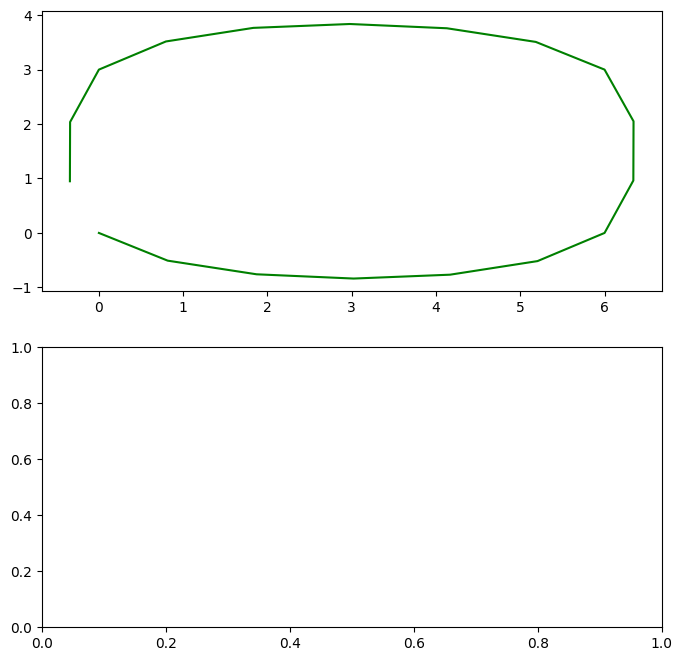

In [20]:
###homework assignment
import matplotlib.pyplot as plt

path = [[0,0],
        [1,0],
        [2,0],
        [3,0],
        [4,0],
        [5,0],
        [6,0],
        [6,1],
        [6,2],
        [6,3],
        [5,3],
        [4,3],
        [3,3],
        [2,3],
        [1,3],
        [0,3],
        [0,2],
        [0,1]]

fix = [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
def smooth(path, fix, weight_data = 0.0, weight_smooth = 0.1, tolerance = 0.000001):
    newpath = [[path[col][row] for row in range(len(path[0]))] for col in range(len(path))]
    change = tolerance
    while change >= tolerance:
        change = 0.0
        for i in range(len(path)):
            if not fix[i]:
                for j in range(len(path[0])):
                    aux = newpath[i][j]
                    newpath[i][j] += weight_data * (path[i][j] - newpath[i][j])
                    newpath[i][j] += weight_smooth * (newpath[(i+1) % len(path)][j] + newpath[(i-1)%len(path)][j] - 2.0 * newpath[i][j])
                    newpath[i][j] += 0.4 * weight_smooth * ((2*newpath[(i-1) %len(path)][j]) - newpath[(i-2)%len(path)][j] - newpath[i][j])
                    newpath[i][j] += 0.4 * weight_smooth * ((2*newpath[(i+1) % len(path)][j]) - newpath[(i+2) % len(path)][j] - newpath[i][j])
                    
                    change += abs(aux - newpath[i][j])
    return newpath

newpath = smooth(path, fix)
for i in range(len(path)):
    print('[' + ', '.join('%.3f'%x for x in path[i]) + '] -> [' + ', '.join('%.3f'%x for x in newpath[i]) + ']')
x_data = []
y_data = []
for i in newpath:
    x_data.append(i[0])
    y_data.append(i[1])


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x_data, y_data, 'g', label='P controller')

print(x_data)
print(y_data)

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------
# 
# this is the Robot class
#

class Robot(object):
    def __init__(self, length=20.0):
        """
        Creates robot and initializes location/orientation to 0, 0, 0.
        """
        self.x = 0.0
        self.y = 0.0
        self.orientation = 0.0
        self.length = length
        self.steering_noise = 0.0
        self.distance_noise = 0.0
        self.steering_drift = 0.0

    def set(self, x, y, orientation):
        """
        Sets a robot coordinate.
        """
        self.x = x
        self.y = y
        self.orientation = orientation % (2.0 * np.pi)

    def set_noise(self, steering_noise, distance_noise):
        """
        Sets the noise parameters.
        """
        # makes it possible to change the noise parameters
        # this is often useful in particle filters
        self.steering_noise = steering_noise
        self.distance_noise = distance_noise

    def set_steering_drift(self, drift):
        """
        Sets the systematical steering drift parameter
        """
        self.steering_drift = drift
        
    def cte(self, raduis):
        if self.x < radius:
            cte = sqrt((self.x - radius) ** 2 + (self.y - radius) ** 2) - radius 
        elif self.x > 3.0 * radius:
            cte = sqrt((self.x - 3.0 * raduis) ** 2 + (self.y - radius) ** 2) - radius 
        elif self.y > radius:
            cte = self.y - 2.0 * radius
        else:
            cte = - self.y
        return cte
        

    def move(self, steering, distance, tolerance=0.001, max_steering_angle=np.pi / 4.0):
        """
        steering = front wheel steering angle, limited by max_steering_angle
        distance = total distance driven, most be non-negative
        """
        if steering > max_steering_angle:
            steering = max_steering_angle
        if steering < -max_steering_angle:
            steering = -max_steering_angle
        if distance < 0.0:
            distance = 0.0

        # apply noise
        steering2 = random.gauss(steering, self.steering_noise)
        distance2 = random.gauss(distance, self.distance_noise)

        # apply steering drift
        steering2 += self.steering_drift

        # Execute motion
        turn = np.tan(steering2) * distance2 / self.length

        if abs(turn) < tolerance:
            # approximate by straight line motion
            self.x += distance2 * np.cos(self.orientation)
            self.y += distance2 * np.sin(self.orientation)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
        else:
            # approximate bicycle model for motion
            radius = distance2 / turn
            cx = self.x - (np.sin(self.orientation) * radius)
            cy = self.y + (np.cos(self.orientation) * radius)
            self.orientation = (self.orientation + turn) % (2.0 * np.pi)
            self.x = cx + (np.sin(self.orientation) * radius)
            self.y = cy - (np.cos(self.orientation) * radius)

    def __repr__(self):
        return '[x=%.5f y=%.5f orient=%.5f]' % (self.x, self.y, self.orientation)






def run(parms, radius, printflag=False):
    robot = Robot()
    robot.set(0.0, radius, pi/2.0)
    n = 200
    speed = 1.0
    error = 0.0
    
    CTE_P = robot.cte(radius)
    CTE_I = 0
    for i in range(n * 2):
        CTE_D = - CTE_P
        CTE_P = robot.cte(radius)
        CTE_D += CTE_P
        CTE_I += CTE_P
        steering = -parms[0] * CTE_P -parms[1] * CTE_D - parms[2] * CTE_I
        robot.move(steering, speed)
        
       
        
        if i >= n:
            error += (CTE_P ** 2)
        if printflag:
            print(robot, steering / pi * 180.0)
    return error / float(n)

radius = 25.0
params = [10.0, 15.0, 0.0]
err = run(params, radius, True)
print(f'final parameters: {params}, error --> {err}')


[x=0.00000 y=26.00000 orient=1.57080] -0.0
[x=0.01365 y=26.99988 orient=1.54349] -28.636439758806905
[x=0.06592 y=27.99840 orient=1.49349] -77.7225272819326
[x=0.16804 y=28.99307 orient=1.44349] -105.94035116369324
[x=0.31973 y=29.98139 orient=1.39349] -118.51192819241938
[x=0.52064 y=30.96090 orient=1.34349] -125.16732491170299
[x=0.77025 y=31.92914 orient=1.29349] -125.89815919319217
[x=1.06793 y=32.88369 orient=1.24349] -120.70355284685614
[x=1.41296 y=33.82218 orient=1.19349] -109.59013067749959
[x=1.80445 y=34.74224 orient=1.14349] -92.57202867103595
[x=2.24145 y=35.64159 orient=1.09349] -69.6709113642793
[x=2.71993 y=36.51960 orient=1.05016] -40.91599851290714
[x=3.22162 y=37.38464 orient=1.04034] -11.114360849517107
[x=3.72989 y=38.24584 orient=1.03489] -6.215084962052268
[x=4.25610 y=39.09613 orient=0.99837] -36.14256219169798
[x=4.81855 y=39.92283 orient=0.94837] -65.43632382511939
[x=5.42162 y=40.72039 orient=0.89837] -73.60928714797204
[x=6.06380 y=41.48681 orient=0.84837] -